In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision

https://qiita.com/mathlive/items/8e1f9a8467fff8dfd03c
https://tasotasoso.hatenablog.com/entry/2020/01/12/184130?utm_source=feed
https://qiita.com/mathlive/items/2a512831878b8018db02

In [36]:
# 画像変換する　ダウンロード時に処理したい内容を書く　
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5,), (0.5,))])

In [37]:
trainset = torchvision.datasets.MNIST(root='path', train=True, download=True, transform=trans)

In [38]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [39]:
# dataloaderで必要なデータ数だけ取り出す
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

In [40]:
testset = torchvision.datasets.MNIST(root = 'path', train = False, download = True, transform = trans)
testloader = torch.utils.data.DataLoader(testset, batch_size = 100, shuffle = False, num_workers = 2)

In [41]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: path
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [42]:
import torch.nn as nn

In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, stride=2)
        # input output_channel filter_size
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        
        # 行列ではなくベクトルを入力する　ベクトルのサイズ　と出力後のサイズ
        # 5 \times 5の画像が32channel (枚)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # x.size() = batchsize, channel, height, width
        # よって、100個の行ベクトルを作っている
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [44]:
import torch.optim as optim

In [45]:
device = torch.device("cpu")
net = Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.005)

In [46]:
print(net)

Net(
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


## 訓練

batch_size = 100だったため
ループは総データ数を割ってtrainloaderのforは600000/100 = 600回回る
この回数600はパラメータの更新回数でイテレーションという。

このすべてのデータを見切るのを1epochといい1回実行している

In [48]:


for epoch in range(1):
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # 勾配情報を基にパラメータ更新する　net.parameters()を渡していたので自動でパラメータが更新される
        optimizer.step()
    
    for (inputs, labels) in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
    print(epoch)

0


In [52]:
train_loss_value=[]
train_acc_value=[]
test_loss_value=[]
test_acc_value=[]
EPOCH=10
BATCH_SIZE = 100

In [ ]:
for epoch in range(EPOCH):
    print('epoch', epoch+1)
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    train_loss_value.append(sum_loss*BATCH_SIZE/len(trainloader.dataset))  #traindataのlossをグラフ描画のためにlistに保持
    train_acc_value.append(float(sum_correct/sum_total))   #traindataのaccuracyをグラフ描画のためにlistに保持

    sum_loss =0
    sum_correct = 0
    sum_total=0
    
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()                            #lossを足していく 損失値
        _, predicted = outputs.max(1)                      #出力の最大値の添字(予想位置)を取得 axis=1なので行ごとの最大値
        sum_total += labels.size(0)                        #labelの数を足していくことでデータの総和を取る
        sum_correct += (predicted == labels).sum().item()  #予想位置と実際の正解を比べ,正解している数だけ足す
        
    print("test  mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(testloader.dataset), float(sum_correct/sum_total)))
    test_loss_value.append(sum_loss*BATCH_SIZE/len(testloader.dataset))
    test_acc_value.append(float(sum_correct/sum_total))

epoch 1
test  mean loss=2.3220346270501615, accuracy=0.8892666666666666
epoch 2
test  mean loss=2.1961763314902782, accuracy=0.8948833333333334
epoch 3
test  mean loss=2.085050191730261, accuracy=0.89915
epoch 4


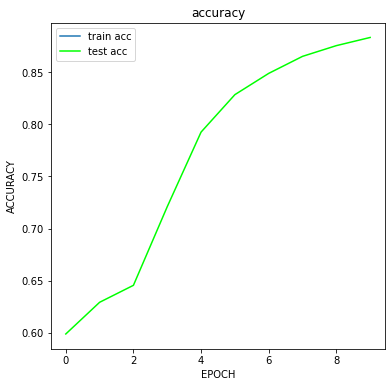

In [58]:
plt.figure(figsize=(6,6))      #グラフ描画用

#以下グラフ描画
plt.plot(range(len(train_loss_value)), train_loss_value)
plt.plot(range(len(test_loss_value)), test_loss_value, c='#00ff00')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend(['train loss', 'test loss'])
plt.title('loss')
plt.savefig("loss_image.png")
plt.clf()

plt.plot(range(len(train_acc_value)), train_acc_value)
plt.plot(range(len(test_acc_value)), test_acc_value, c='#00ff00')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend(['train acc', 'test acc'])
plt.title('accuracy')
plt.savefig("accuracy_image.png")